# Lab 5 - Two-way ANOVA with interactions

In [35]:
import pandas as pd
import numpy as np 
from plotnine import ggplot, aes, geom_bar, stat_qq, stat_qq_line, position_dodge, geom_col, theme_minimal
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

## Question Set 1

The drug dataset was collected in an effort to determine whether different dose levels of a given drug have an effect on blood pressure for people with one of three types of heart disease.

The dataset has the following variables:

DrugDose: dosage level of drug (1, 2, 3, 4), corresponding to Placebo, 50mg, 100mg, and 200mg respectively.

Disease: heart disease category

BloodP: change in diastolic blood pressure after 2 weeks of treatment

In [2]:
drugs = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/drug.csv")

### Question 1a

Create a side by side bar chart. Which chart is the correct chart?

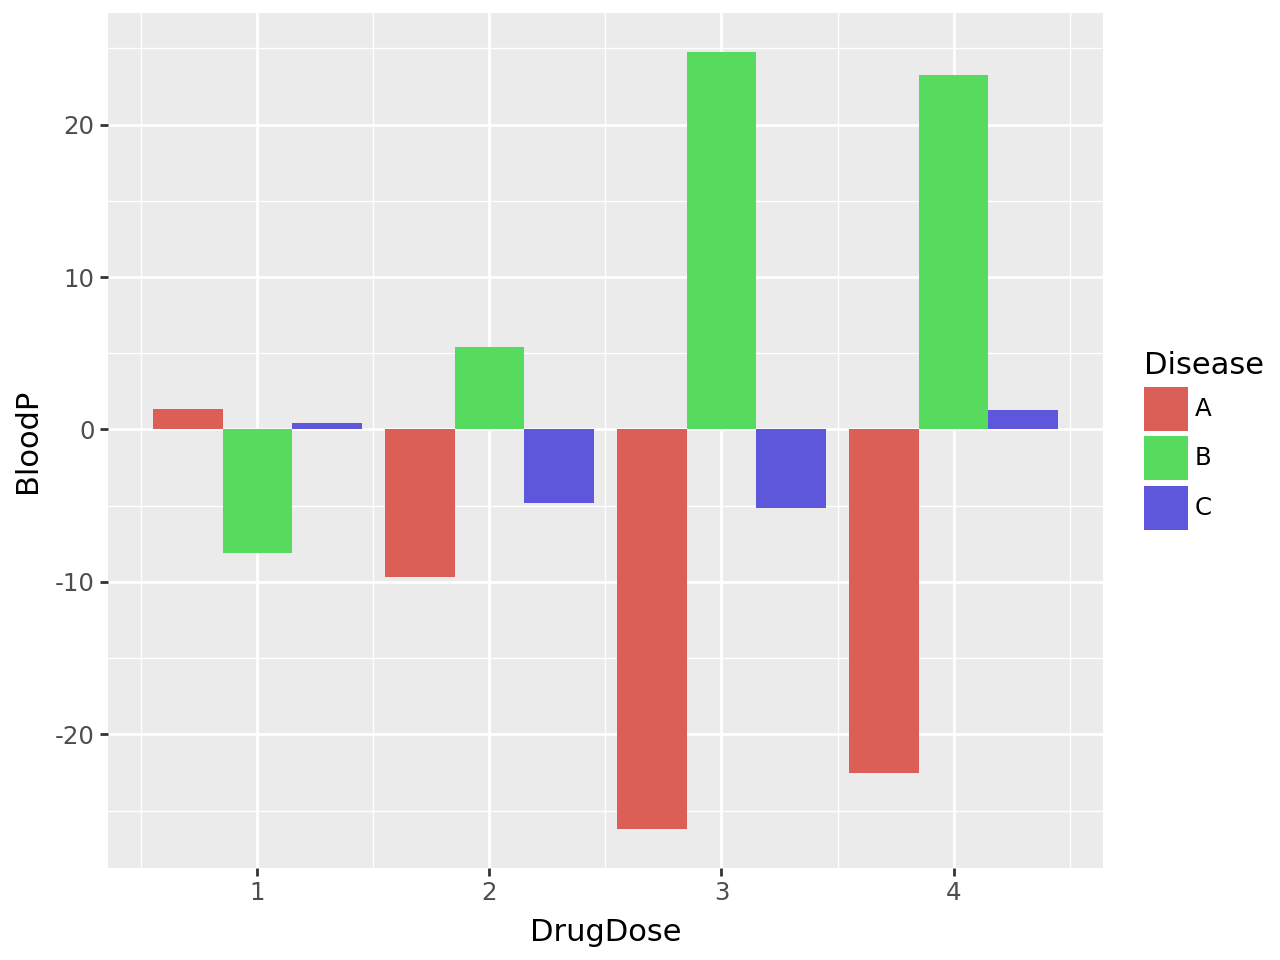

In [42]:
drug_summary = drugs.groupby(['DrugDose', 'Disease']).agg(
    BloodP = ('BloodP', 'mean')
).reset_index()

drugs_bar = (ggplot(drug_summary, aes(x = 'DrugDose', y = 'BloodP', fill = 'Disease')) +
             geom_bar(stat='identity', position = "dodge"))

drugs_bar.show()

### Question 1b

Does the drug dose seem to have an effect on disease category A?

Answer: Yes

### Question 1c

Does the drug dose seem to have an effect on disease category B?

Answer: Yes

### Question 1d

Based on the graphs above, should an interaction term be included in a two-way ANOVA to investigate whether there is an interaction?

Answer: Yes

### Question 1e

Run a two-way ANOVA with an interaction term (regardless of the answer in part d). Is there evidence of an interaction?

In [ ]:
drugs_anova = smf.ols("BloodP ~ DrugDose * Disease", data = drug_summary).fit()

drugs_anova.summary()

c:\Users\wdcru\anaconda3\envs\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BloodP   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     13.12
Date:                Tue, 08 Jul 2025   Prob (F-statistic):            0.00350
Time:                        21:24:28   Log-Likelihood:                -34.326
No. Observations:                  12   AIC:                             80.65
Df Residuals:                       6   BIC:                             83.56
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.7674      7.322      1.061      0.330     -10.149      25.684
Disease[T.B]            -24.8161     10.355     -2.397      0.054     -50.154       0.522
Disease[T.C]            -10.4157     10.355     -1.006      0.353     -35.754      14.922
DrugDose                 -8.8210      2.674     -3.299      0.016     -15.363      -2.279
DrugDose:Disease[T.B]    20.1688      3.781      5.334      0.002      10.917      29.421
DrugDose:Disease[T.C]     9.0551      3.781      2.395      0.054      -0.197      18.307
==============================================================================
Omnibus:                        0.065   Durbin-Watson:                   3.160
Prob(Omnibus):                  0.968   Jarque-Bera (JB):                0.295
Skew:                           0.035   Prob(JB):                        0.863
Kurtosis:                       2.235   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
sms.anova_lm(drugs_anova, typ=2)

,sum_sq,df,F,PR(>F)
Disease,1312.225518,2.0,18.356432,0.002772
DrugDose,12.704047,1.0,0.355428,0.572845
DrugDose:Disease,1020.482600,2.0,14.275305,0.005237
Residual,214.457607,6.0,NaN,NaN


Answer: Yes

## Question Set 2

A computer service center has four technicians who specialize in repairing three brands of computer disk drives for desktop computers. the service center wants to study the effects of the technician and brand of the disk drive on the service time. The data is in the disks dataset.

The dataset has the following variables:
Technician: name of the technician (Angela, Bob, Justin, or Karen)
Brand: brand of disk drive (1, 2, or 3)
Time: time for repair (in minutes)

In [49]:
disks = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/disks.csv")

### Question 2a

Does it make sense to consider an interaction term in the ANOVA?

In [ ]:
disks_summary = disks.groupby(['Technician', 'Brand']).agg(
    Time = ('Time', 'mean')
).reset_index()

,Technician,Brand,Time
0,Angela,1,37.500
1,Angela,2,31.250
2,Angela,3,49.625
3,Bob,1,56.875
4,Bob,2,72.125
5,Bob,3,43.125
6,Justin,1,42.500
7,Justin,2,45.000
8,Justin,3,44.500
9,Karen,1,73.000


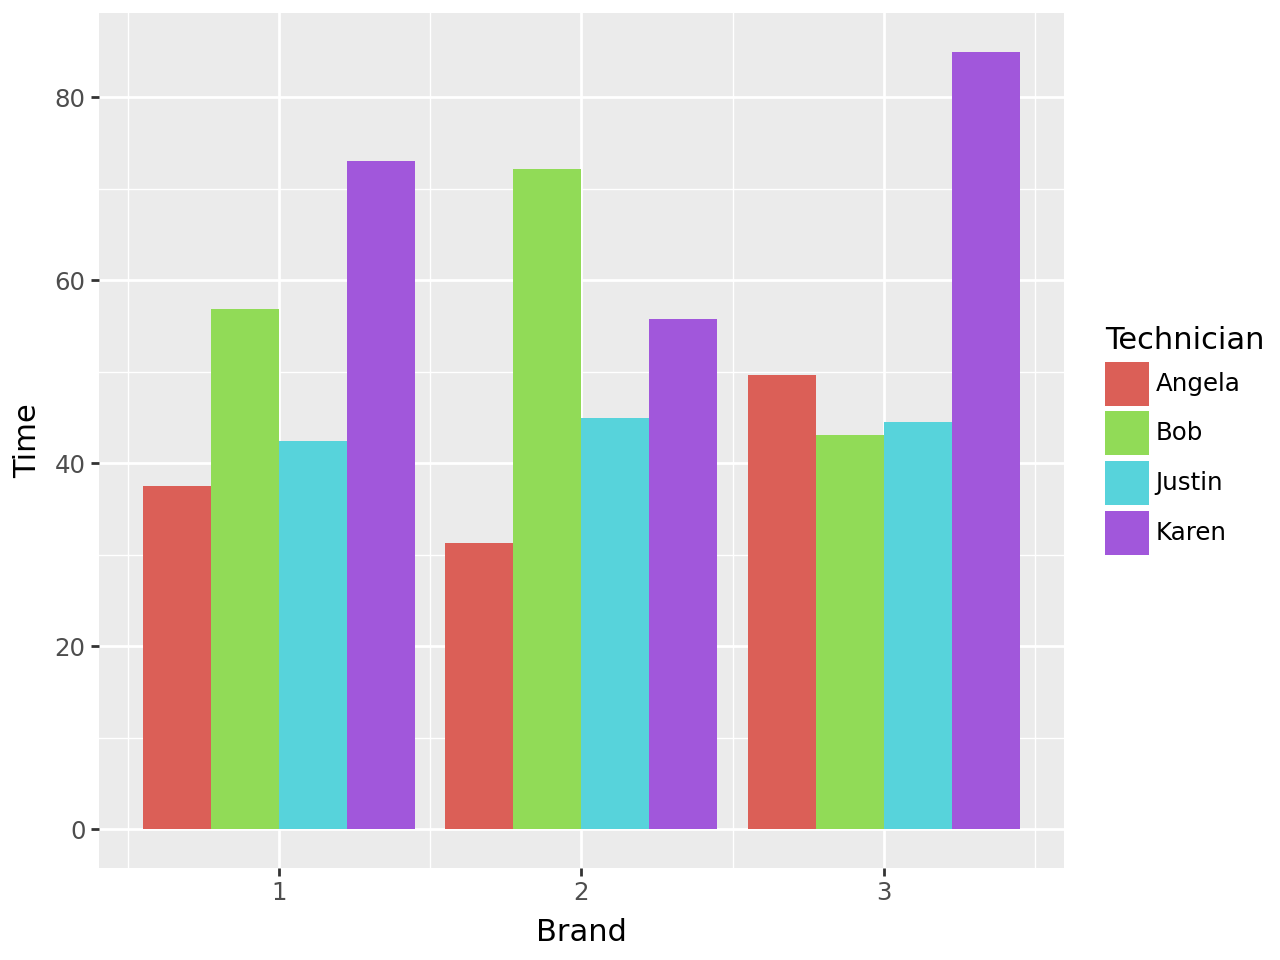

In [59]:
disks_bar = (ggplot(disks_summary, aes(x = 'Brand', y = 'Time', fill = 'Technician')) +
             geom_bar(stat='identity', position = "dodge"))

disks_bar.show()

Answer: Yes, different technicians may be more skilled with certain brands

### Question 2b

Run the two-way ANOVA with Time as the response variable and Technician and Brand as independent variables. Include an interaction term regardless of the answer in part a). Is the interaction significant?

In [60]:
disks_anova = smf.ols("Time ~ Technician * Brand", data = disks_summary).fit()

disks_anova.summary()

c:\Users\wdcru\anaconda3\envs\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     1.514
Date:                Tue, 08 Jul 2025   Prob (F-statistic):              0.361
Time:                        21:43:24   Log-Likelihood:                -42.145
No. Observations:                  12   AIC:                             100.3
Df Residuals:                       4   BIC:                             104.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     27.3333     21.457      1.274      0.272     -32.242      86.908
Technician[T.Bob]             43.7917     30.345      1.443      0.222     -40.460     128.043
Technician[T.Justin]          14.6667     30.345      0.483      0.654     -69.585      98.918
Technician[T.Karen]           31.9167     30.345      1.052      0.352     -52.335     116.168
Brand                          6.0625      9.933      0.610      0.575     -21.515      33.640
Technician[T.Bob]:Brand      -12.9375     14.047     -0.921      0.409     -51.938      26.063
Technician[T.Justin]:Brand    -5.0625     14.047     -0.360      0.737     -44.063      33.938
Technician[T.Karen]:Brand     -0.0625     14.047     -0.004      0.997     -39.063      38.938
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   3.313
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.227
Skew:                          -0.125   Prob(JB):                        0.893
Kurtosis:                       2.375   Cond. No.                         32.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
sms.anova_lm(disks_anova, typ = 2)

,sum_sq,df,F,PR(>F)
Technician,1849.734375,3.0,3.124747,0.149927
Brand,19.142578,1.0,0.097012,0.771003
Technician:Brand,222.896484,3.0,0.376538,0.775786
Residual,789.283854,4.0,NaN,NaN


Answer: No

### Question 2c

Is the overall F-test significant? 

Answer: at 0.361, no

### Question 2d

Perform a test to determine if there are statistical differences in average Time across Technicians for Brand 1. What is the interpretation of the estimate for Bob?

In [66]:
disks_brand_1_anova = smf.ols("Time ~ Technician", disks[disks['Brand'] == 1]).fit()

disks_brand_1_anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     15.21
Date:                Tue, 08 Jul 2025   Prob (F-statistic):           4.61e-06
Time:                        21:48:02   Log-Likelihood:                -121.64
No. Observations:                  32   AIC:                             251.3
Df Residuals:                      28   BIC:                             257.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               37.5000      4.093      9.162      0.000      29.116      45.884
Technician[T.Bob]       19.3750      5.789      3.347      0.002       7.518      31.232
Technician[T.Justin]     5.0000      5.789      0.864      0.395      -6.857      16.857
Technician[T.Karen]     35.5000      5.789      6.133      0.000      23.643      47.357
==============================================================================
Omnibus:                        0.081   Durbin-Watson:                   2.266
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.245
Skew:                          -0.098   Prob(JB):                        0.885
Kurtosis:                       2.619   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Question Set 3

A bike sharing company (Capital Bike Share) has collected data on the number of riders in each hour along with a variety of predictor variables (the bike dataset). The independent variables we will use are: 
workingday: which is a categorical variable that is 1 if day is neither a weekend nor holiday and 0 otherwise 
season: 1 = Winter, 2 = Spring, 3 = Summer, 4 = Fall

You are interested in the combined effect of season and workingday on the impact of the total users (cnt). You think that there might be an interaction to these - weekends would be impacted differently with season and workingday to predict user count.

In [68]:
bike = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/bike.csv")

### Question 3a

Run a two-way ANOVA with cnt as the response variable and workingday and season as the independent variables (remember to include the interaction since that's what you're investigating). Is the interaction significant?

In [82]:
bike_summary = bike.groupby(['workingday', 'season']).agg(
    count = ('cnt', 'mean')
).reset_index()

bike_anova = smf.ols("count ~ workingday * season", data = bike_summary).fit()

bike_anova.summary()

c:\Users\wdcru\anaconda3\envs\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     1.160
Date:                Tue, 08 Jul 2025   Prob (F-statistic):              0.428
Time:                        21:56:16   Log-Likelihood:                -39.918
No. Observations:                   8   AIC:                             87.84
Df Residuals:                       4   BIC:                             88.15
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           106.3359     61.564      1.727      0.159     -64.592     277.264
workingday           14.8330     87.064      0.170      0.873    -226.896     256.562
season               30.6394     22.480      1.363      0.245     -31.775      93.054
workingday:season    -2.5300     31.791     -0.080      0.940     -90.797      85.737
==============================================================================
Omnibus:                        6.178   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                1.170
Skew:                           0.034   Prob(JB):                        0.557
Kurtosis:                       1.128   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
sms.anova_lm(bike_anova, typ=2)

,sum_sq,df,F,PR(>F)
workingday,144.769425,1.0,0.057295,0.822588
season,8628.522703,1.0,3.414899,0.138319
workingday:season,16.002857,1.0,0.006333,0.940391
Residual,10106.914775,4.0,NaN,NaN


Answer: at p = 0.94, no

### Question 3b

Now run the two-way ANOVA from part a) with the registered users as the response instead of cnt. Is the interaction significant?

In [84]:
bike_summary_2 = bike.groupby(['workingday', 'season']).agg(
    registered = ('registered', 'mean')
).reset_index()

bike_anov_2 = smf.ols("registered ~ workingday * season", data = bike_summary_2).fit()

bike_anov_2.summary()

c:\Users\wdcru\anaconda3\envs\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     3.726
Date:                Tue, 08 Jul 2025   Prob (F-statistic):              0.118
Time:                        21:56:19   Log-Likelihood:                -35.245
No. Observations:                   8   AIC:                             78.49
Df Residuals:                       4   BIC:                             78.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            70.6684     34.329      2.059      0.109     -24.644     165.981
workingday           34.6567     48.549      0.714      0.515    -100.136     169.449
season               21.6652     12.535      1.728      0.159     -13.138      56.469
workingday:season     2.7581     17.727      0.156      0.884     -46.461      51.977
==============================================================================
Omnibus:                        7.773   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                1.279
Skew:                           0.019   Prob(JB):                        0.527
Kurtosis:                       1.041   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
sms.anova_lm(bike_anov_2, typ=2)

,sum_sq,df,F,PR(>F)
workingday,3453.132419,1.0,4.395219,0.104066
season,5310.380815,1.0,6.759164,0.060058
workingday:season,19.017968,1.0,0.024206,0.883897
Residual,3142.625839,4.0,NaN,NaN


Answer: at p = 0.88, no

### Question 3c

Now run the two-way ANOVA from part a) with the casual users as the response instead of cnt. Is the interaction significant?

In [87]:
bike_summary_3 = bike.groupby(['workingday', 'season']).agg(
    casual = ('casual', 'mean')
).reset_index()

bike_anov_3 = smf.ols("casual ~ workingday * season", data = bike_summary_3).fit()

bike_anov_3.summary()

c:\Users\wdcru\anaconda3\envs\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     1.634
Date:                Tue, 08 Jul 2025   Prob (F-statistic):              0.316
Time:                        21:57:26   Log-Likelihood:                -33.757
No. Observations:                   8   AIC:                             75.51
Df Residuals:                       4   BIC:                             75.83
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            35.6675     28.503      1.251      0.279     -43.470     114.805
workingday          -19.8236     40.310     -0.492      0.649    -131.741      92.094
season                8.9742     10.408      0.862      0.437     -19.923      37.871
workingday:season    -5.2882     14.719     -0.359      0.738     -46.155      35.578
==============================================================================
Omnibus:                        1.784   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                0.721
Skew:                           0.058   Prob(JB):                        0.697
Kurtosis:                       1.533   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
sms.anova_lm(bike_anov_3, typ=2)

,sum_sq,df,F,PR(>F)
workingday,2183.818403,1.0,4.032001,0.115063
season,400.699586,1.0,0.739815,0.438219
workingday:season,69.911614,1.0,0.129078,0.737553
Residual,2166.485976,4.0,NaN,NaN


At p = 0.74, no